In [33]:
from imports import *
%run imports.py

Import Done


In [152]:
# read the data
plant1 = pd.read_csv("Plant_1_Generation_Data.csv")
weather1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")


# format DATE_TIME column into datetime object
plant1['DATE_TIME'] = pd.to_datetime(plant1['DATE_TIME'])
weather1['DATE_TIME'] = pd.to_datetime(weather1['DATE_TIME'])

In [153]:
df_weather = weather1.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)
df_plant1 = plant1.drop(['PLANT_ID'], axis=1)
df_plant_weather1 = df_plant1.merge(df_weather, on="DATE_TIME")

In [155]:
if df_plant_weather1.index.name != 'DATE_TIME':
    df_plant_weather1.set_index('DATE_TIME', inplace=True)

if "SOURCE_KEY" in df_plant_weather1.columns:
    df_plant_weather1.drop(["SOURCE_KEY"], axis=1, inplace=True)


In [168]:
# df_plant_weather1["DC_POWER_1"] = df_plant_weather1.groupby(["SOURCE_KEY", pd.Grouper(freq="H")])["DC_POWER"].shift(freq="D", periods=1).reset_index(drop=True)
# df_plant_weather1.index.day
# df_plant_weather1["DC_POWER_1"] = df_plant_weather1.groupby(["SOURCE_KEY"])["DC_POWER"].shift(freq="D", periods=1).reset_index(drop=True)


<AxesSubplot:xlabel='DATE_TIME,DATE_TIME'>

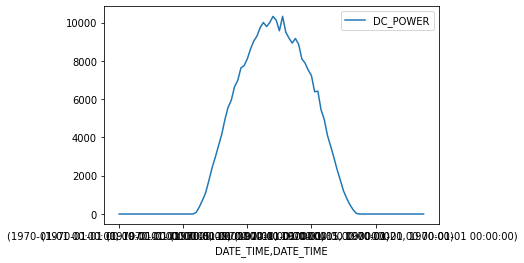

In [171]:
baseline = df_plant_weather1.groupby([pd.to_datetime(df_plant_weather1.index.hour), pd.to_datetime(df_plant_weather1.index.minute)])["DC_POWER"].mean()
df = pd.DataFrame(baseline)
df.plot()


In [151]:
df_plant_weather1.isnull().sum() / df_plant_weather1.shape[0] * 100

SOURCE_KEY               0.0
DC_POWER                 0.0
AC_POWER                 0.0
DAILY_YIELD              0.0
TOTAL_YIELD              0.0
AMBIENT_TEMPERATURE      0.0
MODULE_TEMPERATURE       0.0
IRRADIATION              0.0
DC_POWER_1             100.0
dtype: float64

In [130]:
# df_Test = df_plant_weather1.loc[df_plant_weather1.SOURCE_KEY == "1BY6WEcLGh8j5v7"]
# df_Test.to_csv('test.csv')

In [13]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets using TimeSeriesSplit, 80% training, 20% testing

X_train, X_test, y_train, y_test = train_test_split(df_plant_weather1.index, df_plant_weather1, test_size=0.2, shuffle=False)